Danish Deepak

## Project 16 - Customer Segmentation.

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

%matplotlib inline

In [2]:
# loading the dataset
data = pd.read_csv('Mall_Customers.csv')

# Displaying the first few rows of the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 1) Data Exploration

In [3]:
# Check column data types and for any missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Except the column 'Gender' which is object dtype, every other column is a int dtype.   
There are no missing values.

In [4]:
# Basic statistical analysis
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


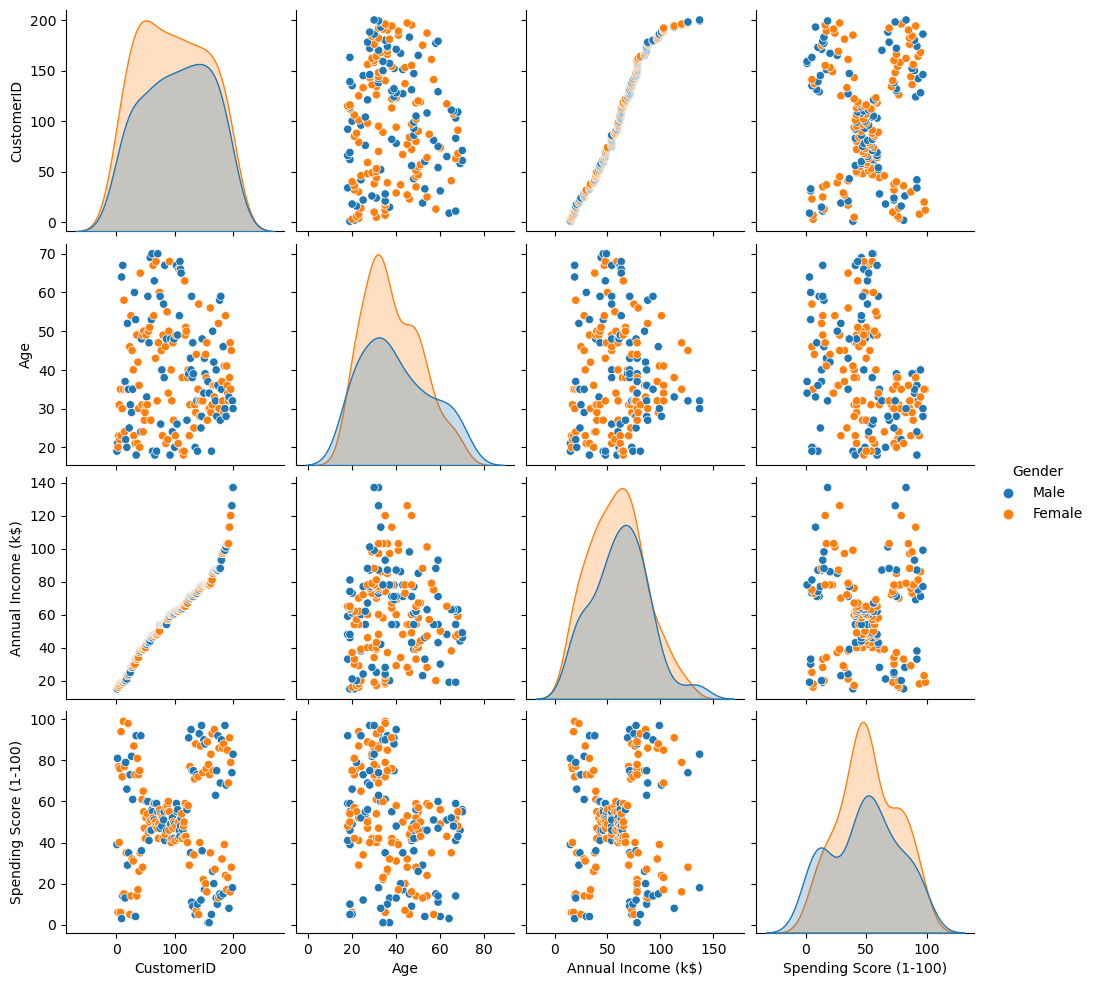

In [5]:
# Visualizing the relationship between every features in the dataset.
sns.pairplot(data, hue = 'Gender')

### 2) Data Transformation

In [6]:
# label encoding the 'Gender' column

data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [7]:
# Scaler transformation of the numerical features in the dataset

scaler   = StandardScaler()
num_cols = ['CustomerID', 'Age' , 'Annual Income (k$)', 'Spending Score (1-100)']
data[num_cols] = scaler.fit_transform(data[num_cols])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,0,-1.424569,-1.738999,-0.434801
1,-1.706091,0,-1.281035,-1.738999,1.195704
2,-1.688771,1,-1.352802,-1.700830,-1.715913
3,-1.671450,1,-1.137502,-1.700830,1.040418
4,-1.654129,1,-0.563369,-1.662660,-0.395980


### 3) Elbow method

In [8]:
sse = [] # sum of squared distances
k_values = range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 27)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

In the context of the K-means algorithm, kmeans.inertia_ refers to the sum of squared distances of samples to their closest cluster center. It is a measure of how internally coherent the clusters are.  
The inertia value quantifies the compactness of the clusters. A lower inertia value indicates that the samples within each cluster are closer to their respective cluster center, suggesting more well-defined and compact clusters.

Text(0.5, 1.0, 'k vs sse')

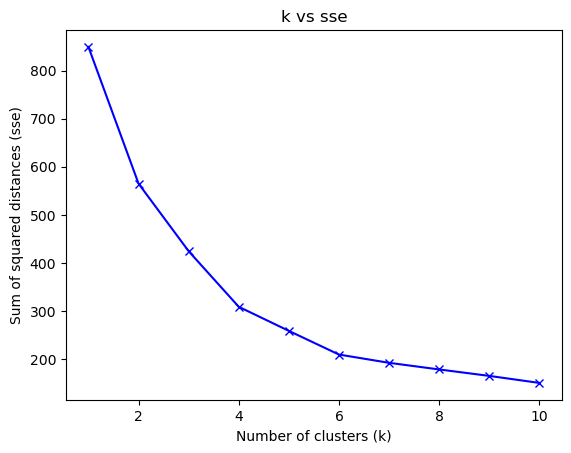

In [9]:
# Plotting the sse values against the k values

plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (sse)')
plt.title('k vs sse')

### 4) Data modelling using K-means algorithm

In [10]:
k = 4 # optimal k value is 4 
kmeans = KMeans(n_clusters = k, random_state = 27)
kmeans.fit(data)
data['KMeans_cluster_label'] = kmeans.labels_

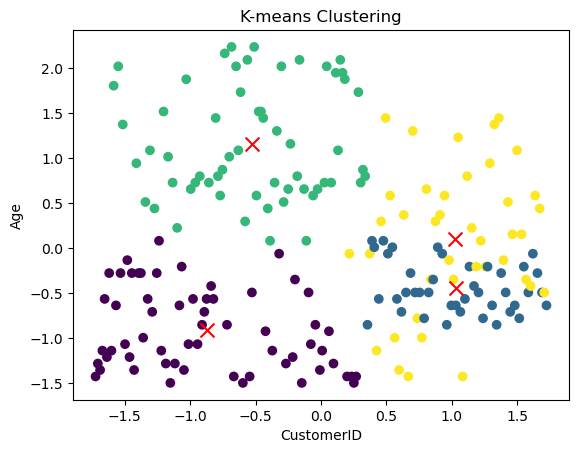

In [11]:
# Visualizing the clusters (CustomerID vs Age)

plt.scatter(data['CustomerID'], data['Age'], c = data['KMeans_cluster_label'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], marker='x', color='red', s=100)
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.title('K-means Clustering')
plt.show()

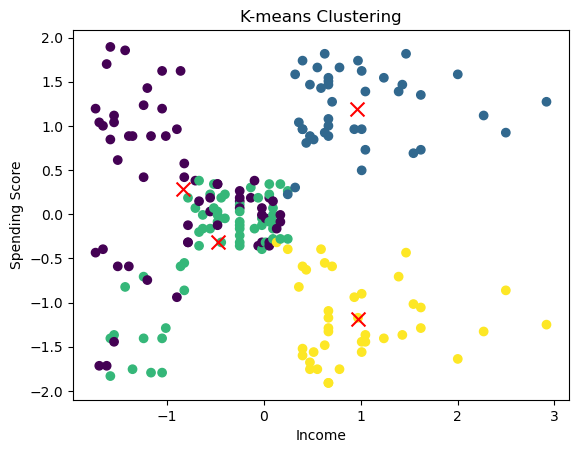

In [12]:
# Visualizing the clusters (Annaul Income(k$), Spending Score (1-100))

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = data['KMeans_cluster_label'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 4], marker='x', color='red', s=100)
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('K-means Clustering')
plt.show()

In [13]:
# Printing the the within-cluster sum of squares.
wcss = kmeans.inertia_
print(f'Within-clusters sum of squares : {wcss}')

Within-clusters sum of squares : 308.62676466544883


### 5) Data modelling using multiple clustering models

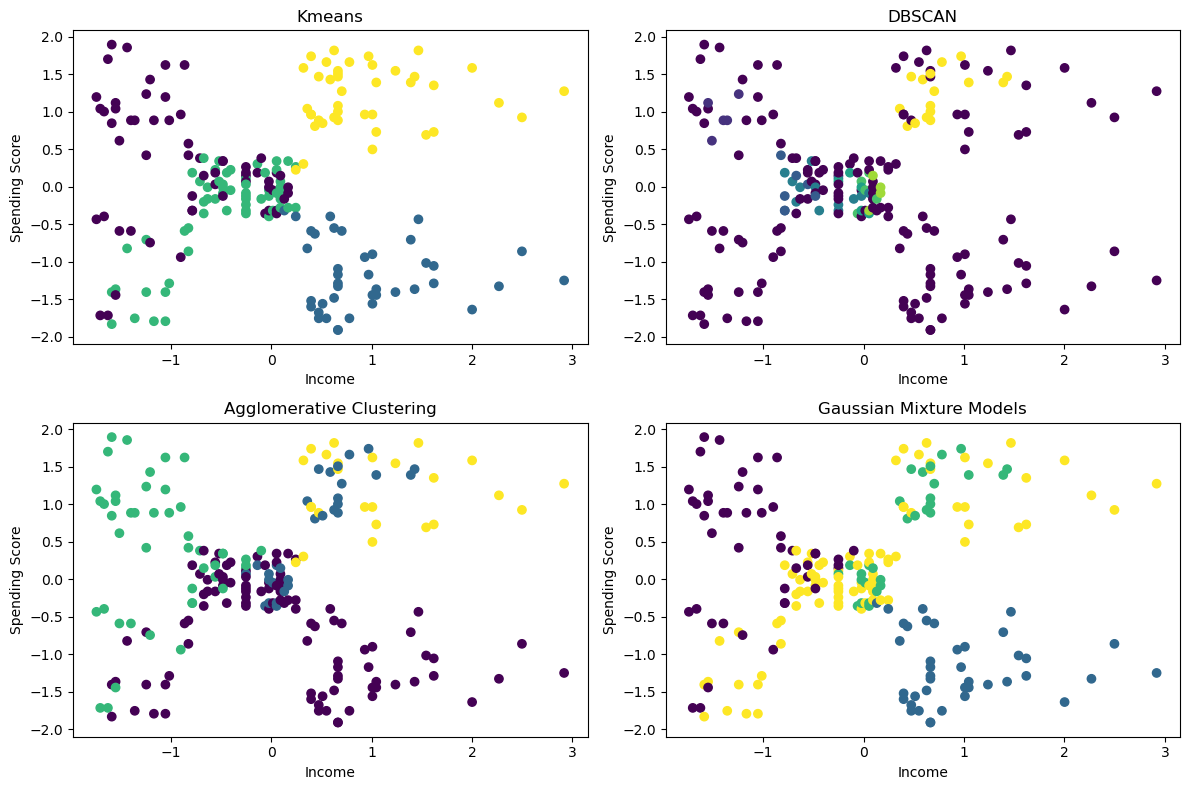

In [14]:
algorithms = {'Kmeans': KMeans(n_clusters = k, random_state = 27),'DBSCAN': DBSCAN(), 'Agglomerative Clustering': AgglomerativeClustering(n_clusters = k), 'Gaussian Mixture Models': GaussianMixture(n_components = k, random_state = 27)}

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, (name, algorithm) in enumerate(algorithms.items()):
    if name == 'Gaussian Mixture Models':
        algorithm.fit(data)
        cluster_probabilities = algorithm.predict_proba(data)
        data[name] = np.argmax(cluster_probabilities, axis=1)
    else:
        algorithm.fit(data)
        data[name] = algorithm.labels_

    # Visualization of Clusters
    axs[i].scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data[name], cmap='viridis')
    axs[i].set_xlabel('Income')
    axs[i].set_ylabel('Spending Score')
    axs[i].set_title(name)

plt.tight_layout()
plt.show()

### 6) Comparing and choosing the best results

In [15]:
eval_metrics = {'Silhouette Score':silhouette_score, 'Calinski Harabasz Score':calinski_harabasz_score, 'Davies Bouldin Score':davies_bouldin_score}

results = {}
for eval_name, eval_func in eval_metrics.items():
    scores = []
    for name, algorithm in algorithms.items():
        if name == 'Gaussian Mixture Models':
            s = eval_func(data, np.argmax(cluster_probabilities, axis = 1))
            scores.append(s)
        else:
            s = eval_func(data, algorithm.labels_)
            scores.append(s)
    best_idx = np.argmax(scores)
    results[eval_name] = {'best_algorithm':list(algorithms.keys())[best_idx], 'Scores':scores}

print('Evaluation Results:')
for metric, result in results.items():
    print('-'*50)
    print(f"{metric}:")
    for name, score in zip(algorithms.keys(), result['Scores']):
        print(f"{name}: {score}")
    print('')
    print(f"Best Algorithm: {result['best_algorithm']}")
    print()


Evaluation Results:
--------------------------------------------------
Silhouette Score:
Kmeans: 0.4263963645928747
DBSCAN: 0.13629988445961838
Agglomerative Clustering: 0.5114479735940898
Gaussian Mixture Models: 0.4610971406275721

Best Algorithm: Agglomerative Clustering

--------------------------------------------------
Calinski Harabasz Score:
Kmeans: 87.55902528417698
DBSCAN: 25.51109436637073
Agglomerative Clustering: 160.6373827381615
Gaussian Mixture Models: 144.25314912581624

Best Algorithm: Agglomerative Clustering

--------------------------------------------------
Davies Bouldin Score:
Kmeans: 1.133063305546984
DBSCAN: 0.7570510582253082
Agglomerative Clustering: 0.7433617744793337
Gaussian Mixture Models: 0.921096564772583

Best Algorithm: Kmeans

